In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import networkx as nx
import asyncio
import aiohttp
import matplotlib.pyplot as plt
import powerlaw

In [2]:
import os
import json

# Specify the path to the folder containing JSON files
data_folder_path = './data/'

# Create an empty dictionary to store data
all_data = {}

# Iterate over all files in the folder
for filename in os.listdir(data_folder_path):
    if filename.endswith(".json"):
        # Form the complete path to the JSON file
        json_file_path = os.path.join(data_folder_path, filename)
        
        # Read the JSON file and store its content in the dictionary
        with open(json_file_path, 'r') as file:
            # Use the filename (without extension) as the key in the dictionary
            all_data[os.path.splitext(filename)[0]] = json.load(file)

# Evolving graphs with nodes of characters and no edges

In [91]:
# Initialize graph and graph dict to append the graphs
first_season = all_data["episodes_seasons_characters"]["Naruto: Original"] # Getting the first seasons from the data file
graph_dict = {}  # Initialize an empty dictionary to store graphs
count = 1 # Initializing a count

# Loop over every episode
for i in range(len(first_season)):
    G = nx.Graph()  # Create a new graph for each episode
    characters = first_season[i]["Episode Characters"] # Characters from each episode as a list
    
    # Add nodes from the previous graph (if it exists). Control statement for the first graph
    if count > 1:
        G.add_nodes_from(graph_dict[f'G{count-1}'].nodes) # Getting the nodes (characters) from the previous graph (episode)

    # Add new characters as nodes
    if characters is not None: # Control statement if the list of characters is empty/None type
        G.add_nodes_from(characters) # Adding the characters

    graph_dict[f'G{count}'] = G # Appending the evolving graph to the dictionary
    count += 1 # Updating the count

# Evolving directed graph with nodes as characters and weighted edges

In [105]:

# Initialize graph and graph dict to append the graphs
first_season = all_data["episodes_seasons_characters"]["Naruto: Original"]  # Getting the first seasons from the data file
graph_dict = {}  # Initialize an empty dictionary to store graphs
count = 1  # Initializing a count

# Loop over every episode
for i in range(len(first_season)):
    G = nx.DiGraph()  # Create a new directed graph for each episode
    characters = first_season[i]["Episode Characters"]  # Characters from each episode as a list

    # Add nodes from the previous graph (if it exists). Control statement for the first graph
    if count > 1:
        G.add_nodes_from(graph_dict[f'G{count-1}'].nodes)  # Getting the nodes (characters) from the previous graph (episode)
        
        # Add edges and update weights from the previous graph
        for edge in graph_dict[f'G{count-1}'].edges(data=True):
            char1, char2, data = edge
            weight = data.get('weight', 0)
            G.add_edge(char1, char2, weight=weight)

    # Add new characters as nodes
    if characters is not None:  # Control statement if the list of characters is empty/None type
        G.add_nodes_from(characters)  # Adding the characters

        # Add weighted edges for characters appearing in the same episode
        for char1 in characters:
            for char2 in characters:
                if char1 != char2:
                    if G.has_edge(char1, char2):
                        G[char1][char2]['weight'] += 1
                    else:
                        G.add_edge(char1, char2, weight=1)

    graph_dict[f'G{count}'] = G  # Appending the evolving graph to the dictionary
    count += 1  # Updating the count

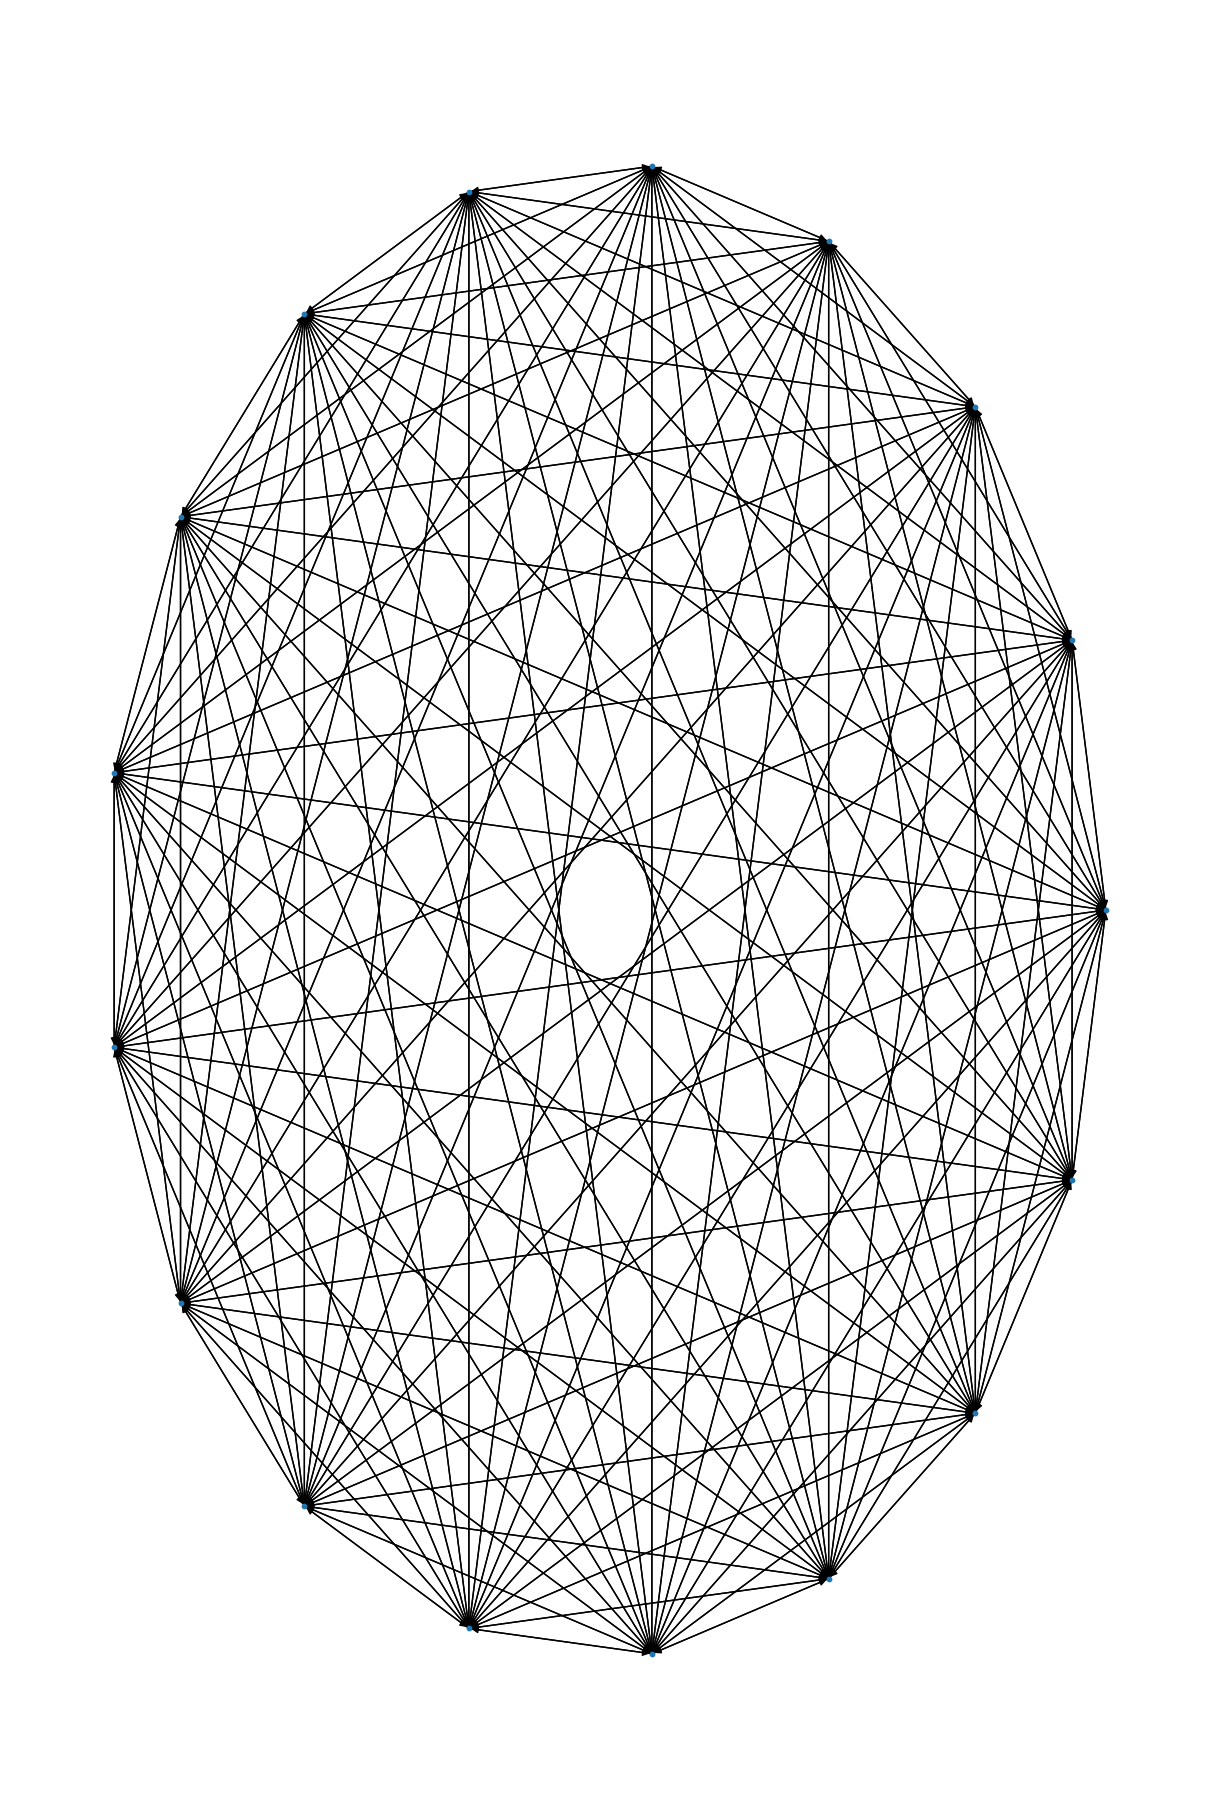

In [141]:
Gtest = graph_dict["G1"]
# Draw the graph with smaller nodes
plt.figure(figsize=(12, 18))
pos = nx.kamada_kawai_layout(Gtest, scale=8.0)  # You can use different layout algorithms
nx.draw(Gtest, pos, node_size=10)  # Adjust node_size as needed

# Show the plot
plt.show()

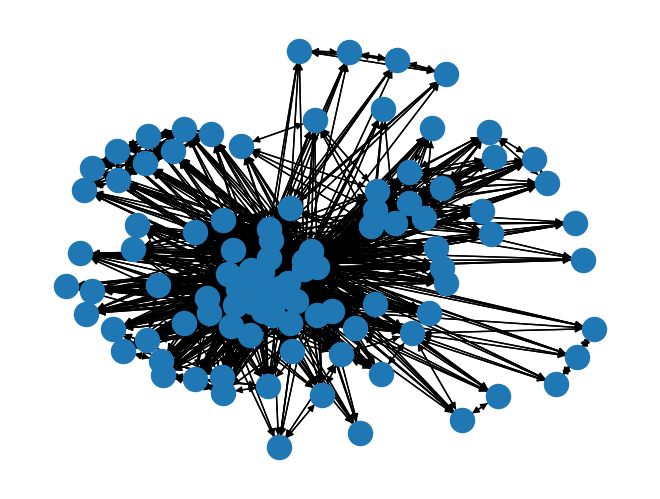

In [110]:
G50 = graph_dict["G50"]
# Draw the graph with smaller nodes
plt.figure(figsize=(12, 18))
pos = nx.kamada_kawai_layout(G50, scale=8.0)  # You can use different layout algorithms
nx.draw(G50, pos, node_size= 10, width=0.1)  # Adjust node_size as needed

## Last episode graph (220) of season 1

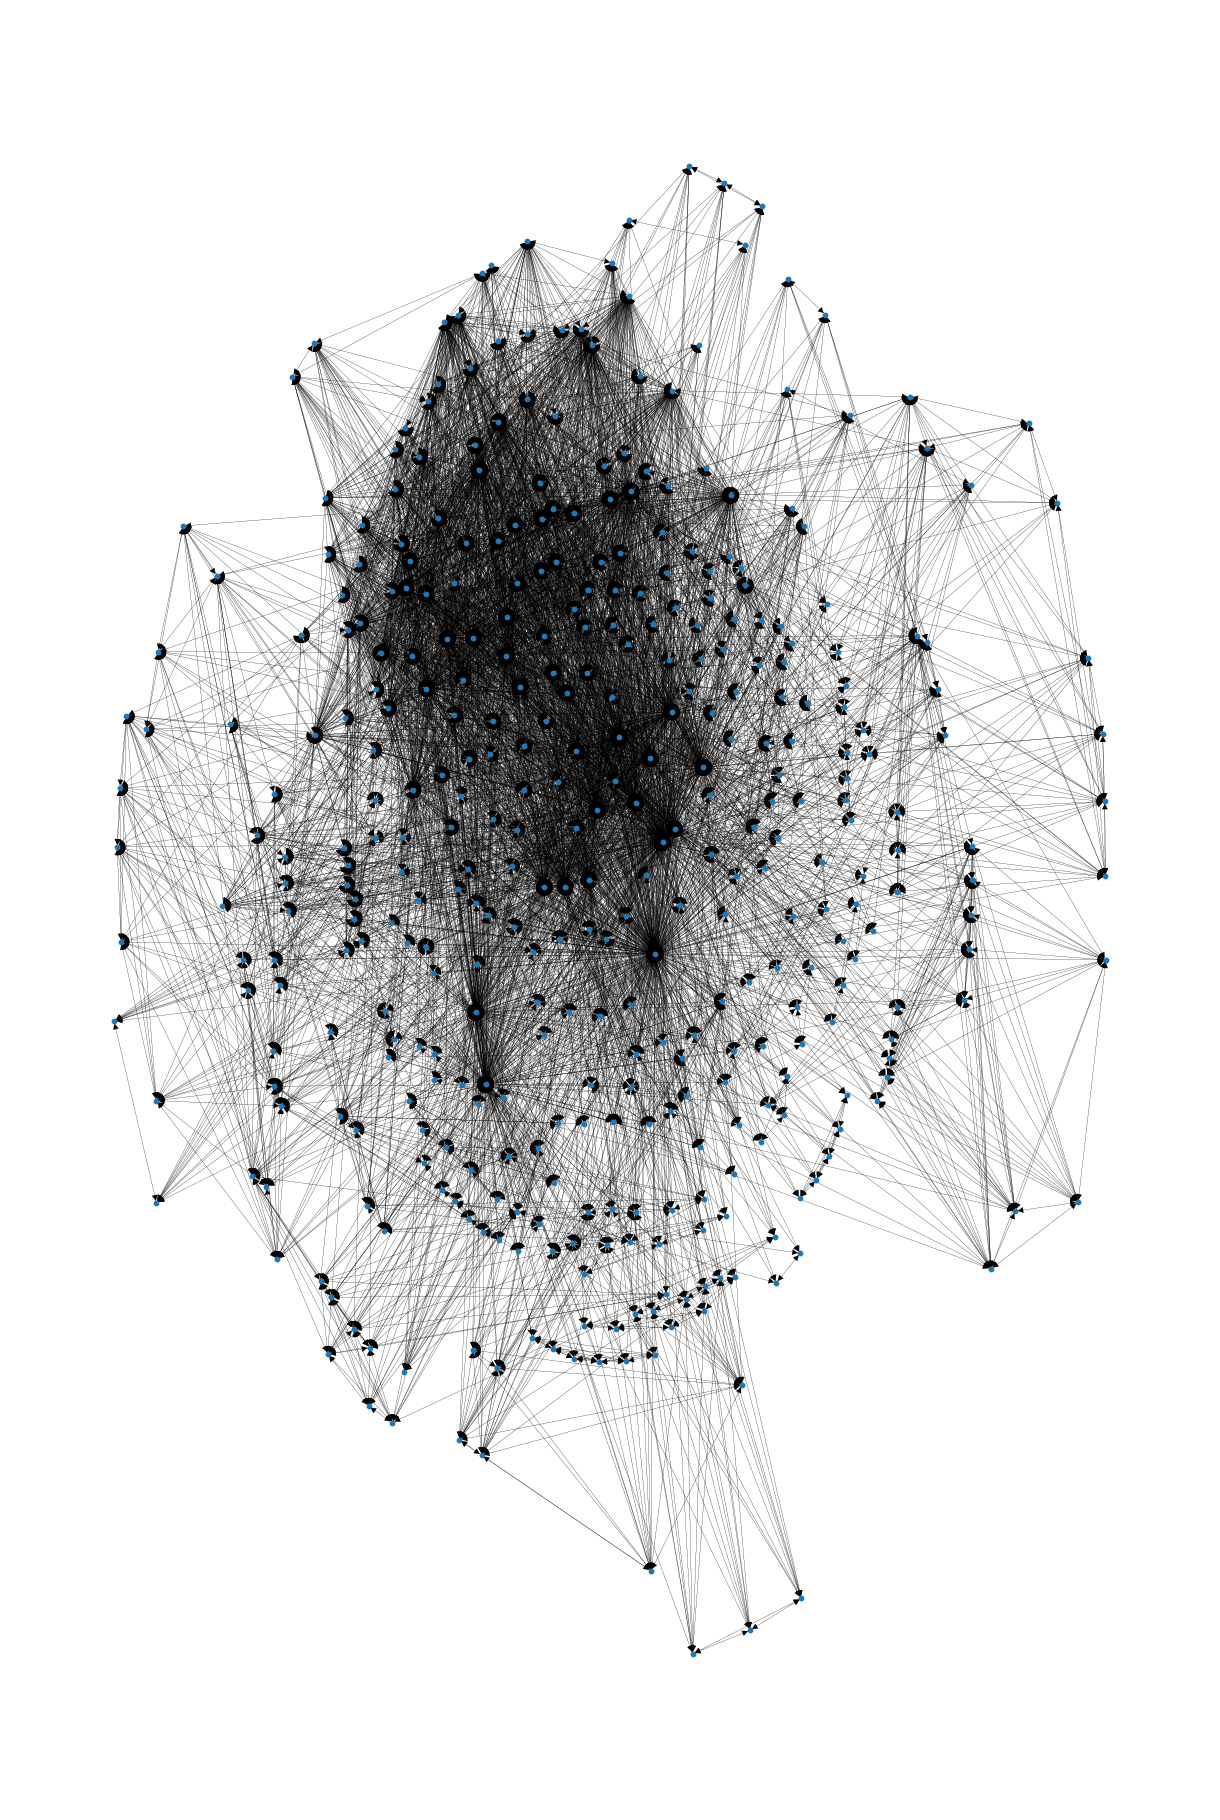

In [146]:
# Last episode of season 1 graph
G220 = graph_dict["G220"]  # Retrieving the graph
degree_dictG220 = degrees = dict(G220.degree()) # Getting the degrees dictionary

# Draw the graph with nodes according to degree
plt.figure(figsize=(12, 18))
pos = nx.kamada_kawai_layout(G220, scale=8.0)  # Kamada kawai force algorithm to position the nodes
node_size=[v * 5 for v in degree_dictG220.values()]  # Making node size vary depending on degree
edge_weights = [G220[u][v]['weight'] for u, v in G220.edges()] # Retrieving the edge weights to vary the edge width
nx.draw(G220, pos, node_size= 10, width=edge_weights, edge_cmap=plt.cm.Blues, edge_vmin=min(edge_weights), edge_vmax=max(edge_weights))  # Adjust node_size as needed

# Show the plot
plt.show()